<a href="https://colab.research.google.com/github/TadGreen/DataMiningHomework1/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 398
Testing set size: 171


In [4]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.9625     0.9125     0.9375     0.98734177 0.96202532]
Mean accuracy: 0.952373417721519


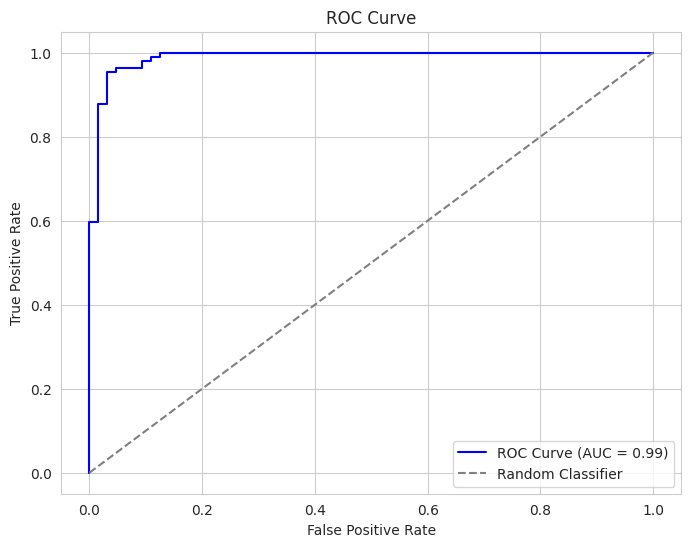

[[8.67172926e-01 1.32827074e-01]
 [6.82545075e-03 9.93174549e-01]
 [1.36490830e-04 9.99863509e-01]
 [9.84863112e-01 1.51368881e-02]
 [3.50924136e-01 6.49075864e-01]
 [9.83710143e-01 1.62898569e-02]
 [9.13979598e-06 9.99990860e-01]
 [9.98734478e-01 1.26552175e-03]
 [1.85449655e-03 9.98145503e-01]
 [9.99999997e-01 2.58627108e-09]
 [1.08974748e-04 9.99891025e-01]
 [1.03206553e-02 9.89679345e-01]
 [9.98225958e-01 1.77404156e-03]
 [4.52086924e-01 5.47913076e-01]
 [3.78375300e-04 9.99621625e-01]
 [8.07536731e-01 1.92463269e-01]
 [9.99984032e-01 1.59680364e-05]
 [4.06259276e-02 9.59374072e-01]
 [4.98717324e-05 9.99950128e-01]
 [4.39188460e-02 9.56081154e-01]
 [8.90278290e-03 9.91097217e-01]
 [8.89208619e-02 9.11079138e-01]
 [1.43898771e-02 9.85610123e-01]
 [9.99997454e-01 2.54590178e-06]
 [9.99999999e-01 1.43853307e-09]
 [1.56837246e-01 8.43162754e-01]
 [3.47331432e-03 9.96526686e-01]
 [1.79430592e-01 8.20569408e-01]
 [9.78056940e-01 2.19430605e-02]
 [9.99970389e-01 2.96107491e-05]
 [4.862589

In [5]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

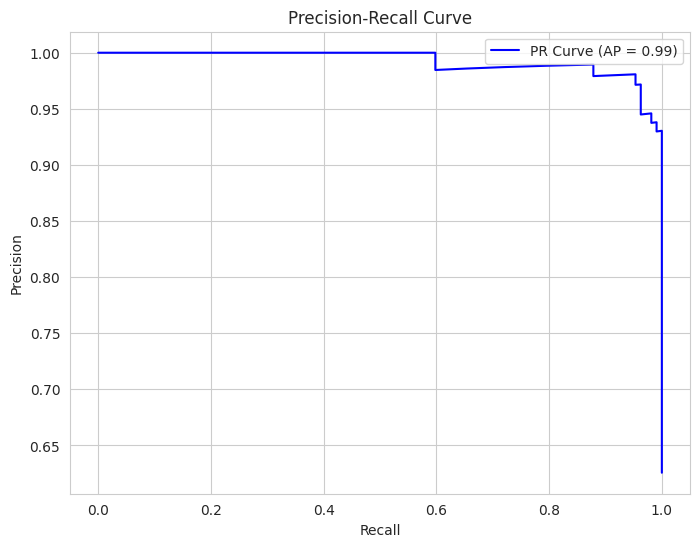

In [6]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


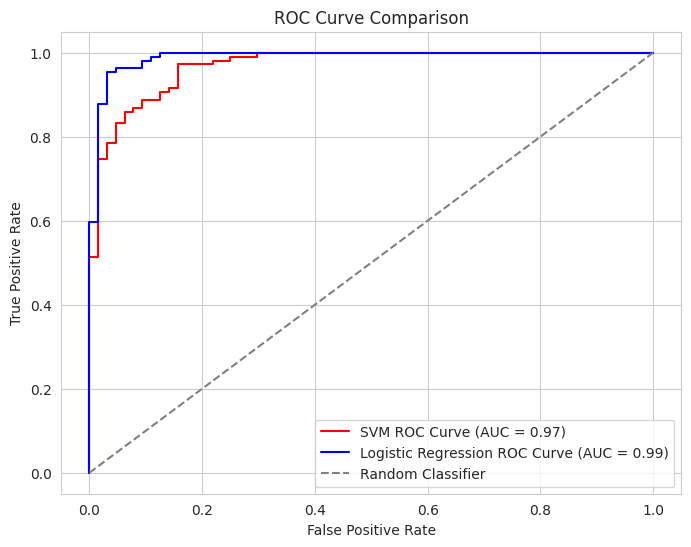

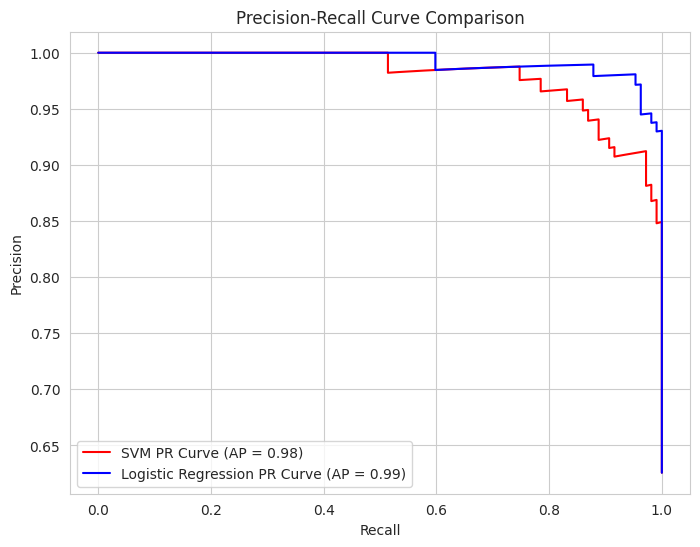

In [7]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(probability=True, random_state=42) # probability=True is needed for predict_proba
svm_model.fit(X_train, y_train)
y_scores_svm = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', label=f"SVM ROC Curve (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr, tpr, color='blue', label=f"Logistic Regression ROC Curve (AUC = {roc_auc:.2f})") # Plot the previous ROC curve for comparison
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Compute Precision-Recall curve for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
ap_score_svm = average_precision_score(y_test, y_scores_svm)

# Plot Precision-Recall Curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='red', label=f"SVM PR Curve (AP = {ap_score_svm:.2f})")
plt.plot(recall, precision, color='blue', label=f"Logistic Regression PR Curve (AP = {ap_score:.2f})") # Plot the previous PR curve for comparison
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()